# Testing the BUG Integrator for Time-Evolution

In [9]:
%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [10]:
from pytreenet.special_ttn.mps import MatrixProductState
from pytreenet.time_evolution.bug import BUG
from pytreenet.time_evolution.exact_time_evolution import ExactTimeEvolution
from pytreenet.operators.common_operators import pauli_matrices
from pytreenet.operators.hamiltonian import Hamiltonian
from pytreenet.operators.tensorproduct import TensorProduct
from pytreenet.ttno.ttno_class import TreeTensorNetworkOperator
from pytreenet.ttno.state_diagram import TTNOFinder

from numpy import eye, kron, zeros

import matplotlib.pyplot as plt

In [11]:
# Parameters
num_sites = 10
dim = 2
time_step_size = 0.01
final_time = 1.0

In [12]:
# Initial state
root_site = 3
mps = MatrixProductState.constant_product_state(0,dim,num_sites,root_site=root_site)
print(list(mps.nodes.keys()))

['site3', 'site2', 'site1', 'site0', 'site4', 'site5', 'site6', 'site7', 'site8', 'site9']


In [13]:
# Build the Hamiltonian
ext_magn = 2.0
factor_Z = 0.5
hamiltonian = Hamiltonian()
for i in range(num_sites-1):
    xx_term = TensorProduct({f"site{i}": "X", f"site{i+1}": "X"})
    hamiltonian.add_term(xx_term)
    yy_term = TensorProduct({f"site{i}": "Y", f"site{i+1}": "Y"})
    hamiltonian.add_term(yy_term)
    zz_term = TensorProduct({f"site{i}": "Z", f"site{i+1}": "JZ"})
    hamiltonian.add_term(zz_term)
    z_term = TensorProduct({f"site{i}": "gZ"})
    hamiltonian.add_term(z_term)
    x_term = TensorProduct({f"site{i}": "gX"})
    hamiltonian.add_term(x_term)
last_z_term = TensorProduct({f"site{num_sites-1}": "gZ"})
hamiltonian.add_term(last_z_term)

X, Y, Z = pauli_matrices()
conversion_dict = {}
conversion_dict["X"] = X
conversion_dict["Y"] = Y
conversion_dict["Z"] = Z
conversion_dict["JZ"] = factor_Z*Z
conversion_dict["gZ"] = ext_magn*Z
conversion_dict["gX"] = ext_magn*X
conversion_dict["I2"] = eye(dim)

hamiltonian.conversion_dictionary = conversion_dict

print(hamiltonian)

[{'site0': 'X', 'site1': 'X'}, {'site0': 'Y', 'site1': 'Y'}, {'site0': 'Z', 'site1': 'JZ'}, {'site0': 'gZ'}, {'site0': 'gX'}, {'site1': 'X', 'site2': 'X'}, {'site1': 'Y', 'site2': 'Y'}, {'site1': 'Z', 'site2': 'JZ'}, {'site1': 'gZ'}, {'site1': 'gX'}, {'site2': 'X', 'site3': 'X'}, {'site2': 'Y', 'site3': 'Y'}, {'site2': 'Z', 'site3': 'JZ'}, {'site2': 'gZ'}, {'site2': 'gX'}, {'site3': 'X', 'site4': 'X'}, {'site3': 'Y', 'site4': 'Y'}, {'site3': 'Z', 'site4': 'JZ'}, {'site3': 'gZ'}, {'site3': 'gX'}, {'site4': 'X', 'site5': 'X'}, {'site4': 'Y', 'site5': 'Y'}, {'site4': 'Z', 'site5': 'JZ'}, {'site4': 'gZ'}, {'site4': 'gX'}, {'site5': 'X', 'site6': 'X'}, {'site5': 'Y', 'site6': 'Y'}, {'site5': 'Z', 'site6': 'JZ'}, {'site5': 'gZ'}, {'site5': 'gX'}, {'site6': 'X', 'site7': 'X'}, {'site6': 'Y', 'site7': 'Y'}, {'site6': 'Z', 'site7': 'JZ'}, {'site6': 'gZ'}, {'site6': 'gX'}, {'site7': 'X', 'site8': 'X'}, {'site7': 'Y', 'site8': 'Y'}, {'site7': 'Z', 'site8': 'JZ'}, {'site7': 'gZ'}, {'site7': 'gX'},

In [14]:
ttno = TreeTensorNetworkOperator.from_hamiltonian(hamiltonian,
                                                  mps,
                                                  method=TTNOFinder.CM)

for identifier, node in ttno.nodes.items():
    print(identifier, node.shape)

site3 (5, 5, 2, 2)
site2 (5, 5, 2, 2)
site1 (5, 5, 2, 2)
site0 (5, 2, 2)
site4 (5, 5, 2, 2)
site5 (5, 5, 2, 2)
site6 (5, 5, 2, 2)
site7 (5, 5, 2, 2)
site8 (5, 5, 2, 2)
site9 (5, 2, 2)


In [15]:
# Operators
ops = {}
for i in range(num_sites):
    op = TensorProduct({f"site{i}": Z})
    ops[f"site{i}"] = op
magn = {f"site{i}": Z for i in range(num_sites)}
magn_op = TensorProduct(magn)
ops["magn"] = magn_op

ops

{'site0': {'site0': array([[ 1.+0.j,  0.+0.j],
        [ 0.+0.j, -1.+0.j]])},
 'site1': {'site1': array([[ 1.+0.j,  0.+0.j],
        [ 0.+0.j, -1.+0.j]])},
 'site2': {'site2': array([[ 1.+0.j,  0.+0.j],
        [ 0.+0.j, -1.+0.j]])},
 'site3': {'site3': array([[ 1.+0.j,  0.+0.j],
        [ 0.+0.j, -1.+0.j]])},
 'site4': {'site4': array([[ 1.+0.j,  0.+0.j],
        [ 0.+0.j, -1.+0.j]])},
 'site5': {'site5': array([[ 1.+0.j,  0.+0.j],
        [ 0.+0.j, -1.+0.j]])},
 'site6': {'site6': array([[ 1.+0.j,  0.+0.j],
        [ 0.+0.j, -1.+0.j]])},
 'site7': {'site7': array([[ 1.+0.j,  0.+0.j],
        [ 0.+0.j, -1.+0.j]])},
 'site8': {'site8': array([[ 1.+0.j,  0.+0.j],
        [ 0.+0.j, -1.+0.j]])},
 'site9': {'site9': array([[ 1.+0.j,  0.+0.j],
        [ 0.+0.j, -1.+0.j]])},
 'magn': {'site0': array([[ 1.+0.j,  0.+0.j],
        [ 0.+0.j, -1.+0.j]]), 'site1': array([[ 1.+0.j,  0.+0.j],
        [ 0.+0.j, -1.+0.j]]), 'site2': array([[ 1.+0.j,  0.+0.j],
        [ 0.+0.j, -1.+0.j]]), 'site3': arr

In [16]:
# BUG time evolution
bug = BUG(mps, ttno, time_step_size, final_time, ops)
bug.run()

  0%|          | 0/101 [00:00<?, ?it/s]

site0

  1%|          | 1/101 [00:00<00:01, 65.55it/s]


vector: (1, 2), h_eff: (2, 2)
site1
vector: (1, 1, 2), h_eff: (4, 4)


ValueError: shapes of matrices A (4, 4) and B (2,) are incompatible

### Reference Time-Evolution

In [9]:
# Hamiltonian Matrix
hamiltonian_matrix, order = ttno.as_matrix()
print("Dimension order:", order)
print(hamiltonian_matrix)

Dimension order: ['site3', 'site2', 'site1', 'site0', 'site4', 'site5', 'site6', 'site7', 'site8', 'site9']
[[ 24.5+0.j   0. +0.j   2. +0.j ...   0. +0.j   0. +0.j   0. +0.j]
 [  0. +0.j  19.5+0.j   2. +0.j ...   0. +0.j   0. +0.j   0. +0.j]
 [  2. +0.j   2. +0.j  18.5+0.j ...   0. +0.j   0. +0.j   0. +0.j]
 ...
 [  0. +0.j   0. +0.j   0. +0.j ... -13.5+0.j   2. +0.j   2. +0.j]
 [  0. +0.j   0. +0.j   0. +0.j ...   2. +0.j -12.5+0.j   0. +0.j]
 [  0. +0.j   0. +0.j   0. +0.j ...   2. +0.j   0. +0.j -15.5+0.j]]


In [10]:
# Exact operators
ops_exact = {key: 1.0 + 0.0j for key in order}
magn_exact = 1.0+0.0j
for key in order:
    magn_exact = kron(magn_exact, Z)
    for key2 in order:
        if key2 == key:
            ops_exact[key] = kron(ops_exact[key], Z)
        else:
            ops_exact[key] = kron(ops_exact[key], eye(dim))
ops_exact["magn"] = magn_exact

In [11]:
# Initial state
state_vector = zeros(dim**num_sites, dtype=complex)
state_vector[0] = 1.0

In [12]:
exact_evo = ExactTimeEvolution(state_vector, hamiltonian_matrix,
                               time_step_size, final_time, ops_exact)
exact_evo.run()

100%|██████████| 101/101 [00:00<00:00, 114.48it/s]


### Plotting

In [13]:
times = bug.times()

In [14]:
magn_bug = bug.operator_result("magn", realise=True)
magn_exact = exact_evo.operator_result("magn", realise=True)
error = abs(magn_bug - magn_exact)

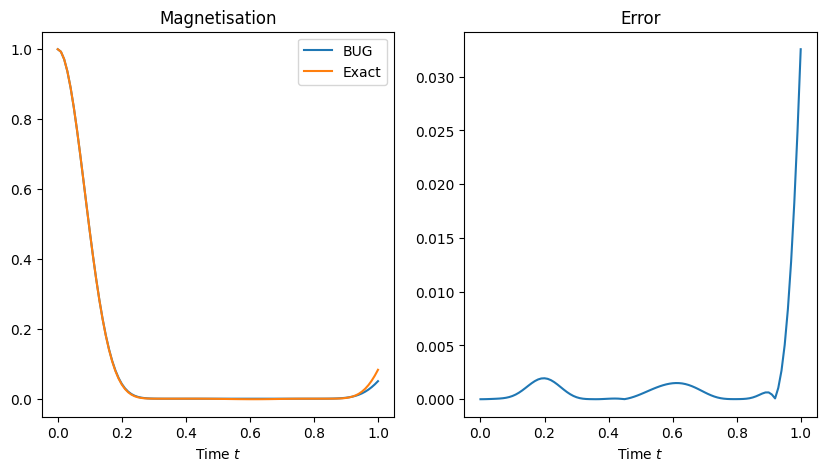

In [15]:
figure, axs = plt.subplots(1, 2, figsize=(10, 5))

axs[0].plot(times, magn_bug, label="BUG")
axs[0].plot(times, magn_exact, label="Exact")
axs[0].set_title("Magnetisation")
axs[0].set_xlabel("Time $t$")
axs[0].legend()

axs[1].plot(times, error)
axs[1].set_title("Error")
axs[1].set_xlabel("Time $t$")

plt.show()

In [16]:
qubit3 = bug.operator_result("site3", realise=True)
qubit3_exact = exact_evo.operator_result("site3", realise=True)
error = abs(qubit3 - qubit3_exact)

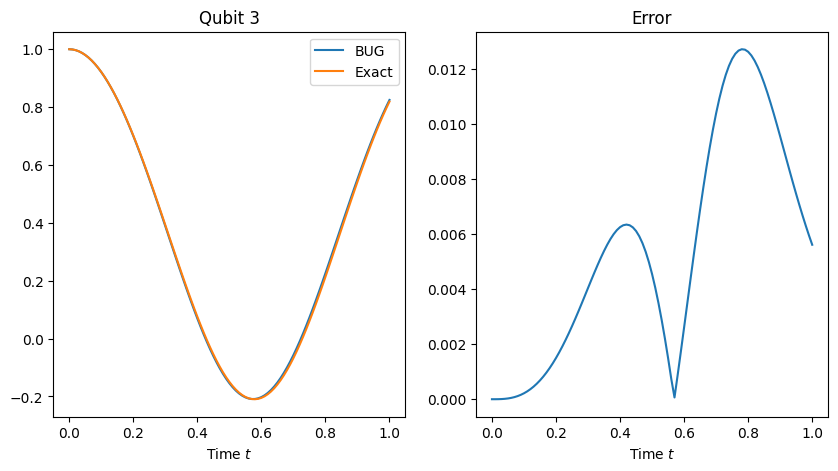

In [17]:
figure, axs = plt.subplots(1, 2, figsize=(10, 5))

axs[0].plot(times, qubit3, label="BUG")
axs[0].plot(times, qubit3_exact, label="Exact")
axs[0].set_title("Qubit 3")
axs[0].set_xlabel("Time $t$")
axs[0].legend()

axs[1].plot(times, error)
axs[1].set_title("Error")
axs[1].set_xlabel("Time $t$")

plt.show()

In [18]:
result_matrix = zeros((len(times), num_sites), dtype=float)
for i in range(num_sites):
    result_matrix[:, i] = bug.operator_result(f"site{i}", realise=True)

result_matrix_exact = zeros((len(times), num_sites), dtype=float)
for i in range(num_sites):
    result_matrix_exact[:, i] = exact_evo.operator_result(f"site{i}", realise=True)

error_matrix = abs(result_matrix - result_matrix_exact)

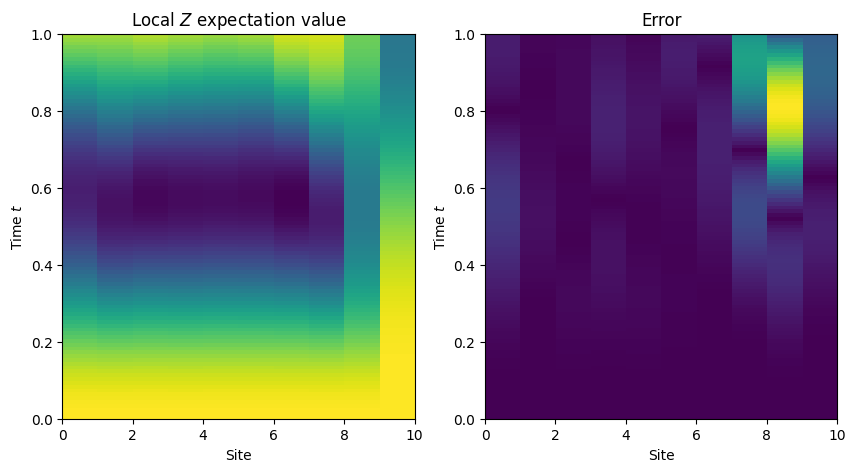

In [19]:
figure, axs = plt.subplots(1, 2, figsize=(10, 5))
ticks = [0, num_sites, times[0], times[-1]]

axs[0].imshow(result_matrix, origin="lower", aspect="auto",
              extent=ticks)
axs[0].set_title("Local $Z$ expectation value")
axs[0].set_xlabel("Site")
axs[0].set_ylabel("Time $t$")


axs[1].imshow(error_matrix, origin="lower", aspect="auto",
              extent=ticks)
axs[1].set_title("Error")
axs[1].set_xlabel("Site")
axs[1].set_ylabel("Time $t$")

plt.show()

In [21]:
print([(node.identifier, node.shape) for node in bug.state.nodes.values()])

[('site3', (1, 1, 2)), ('site2', (1, 1, 2)), ('site1', (1, 1, 2)), ('site0', (1, 2)), ('site4', (1, 1, 2)), ('site5', (1, 1, 2)), ('site6', (1, 1, 2)), ('site7', (1, 1, 2)), ('site8', (1, 1, 2)), ('site9', (1, 2))]
